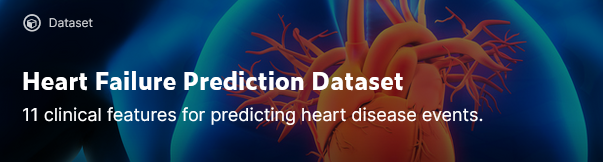

# Heart Failure Prediction Dataset

1) Source of data
> Kaggle:  https://www.kaggle.com/fedesoriano/heart-failure-prediction

2) Brief description of data
> Data includes key attributes that factor into risk of heart failure, for example:  age, sex, chest pain type, resting BP, cholesterol, etc.

3) What is the target?
> Predict Heart Failure

4) Is this a classification or regression problem?
> Classification (Heart Failure (y/n)

5) How many features?
> 12 columns of data relevant to risk of heart failure

6) How many rows of data.
> 918

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
> Looks to be a good data set to choose, given that it looks relatively clean and has a robust set of features to analyze for predicting heart failure.  Looks like a really intersting project!

In [49]:
# Import Libraries (Note:  Classification only, NOT regression!)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model Prep
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline 

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


# Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, plot_confusion_matrix



In [50]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding Dojo/Data_folder/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Exploratory Data Analysis and Visualization

To meet the requirements for this week you must have:

-deleted unnecessary columns

-deleted duplicate rows

-identified and addressed missing values 

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

-produced univariate visuals for the target and all features

-identified outliers

-produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

-clearly commented all of your cleaning steps and described any decisions you made  (Note: During the final stack of the program, you will be making a presentation for a technical audience that includes your decisions and process in the cleaning steps. The more notes you take now, the easier that presentation will be. To clarify, that presentation is NOT due now.)

In [51]:
# Deleting columns

# All columns relevant to analysis, none will be dropped

In [52]:
# duplicate rows
df.duplicated().any()
# No duplicates in the data

False

In [53]:
# missing values 
df.info()
# No missing values, all columns have a count of 918

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [54]:
# Identify outliers
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


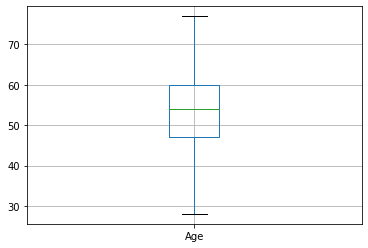

In [55]:
# looking for inconsistencies in data for numerical column 'Age'
df.boxplot(column = 'Age');
# No outliers in the age column, although the min value of 28 years seemed young to me (above)

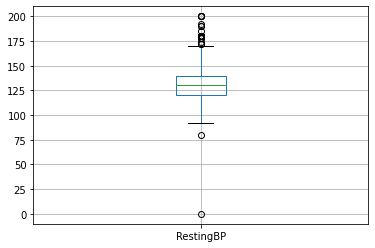

In [56]:
# looking for inconsistencies in data for numerical column 'RestingBP'
df.boxplot(column = 'RestingBP');
# 'RestingBP has a number of outliers.  I will only drop the value of 0
# The high outliers seem very high to me, but there are many
# The lower outlier of ~ 76 seems close enough to keep in the data set

In [57]:
# Exploriung the outliers above 175
df.loc[df['RestingBP'] >= 175, :]
# There are a number of dat points with 'Resting BP' greater than 175
# The rest of the values look ok, so no changes to those data points 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
372,63,M,ASY,185,0,0,Normal,98,Y,0.0,Up,1


In [58]:
# Isolating the outlier
df.loc[df['RestingBP'] == 0, :]
# Note that there are other values missing for entry # 449

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [59]:
# Dropping the outlier
df = df.drop(index = 449)

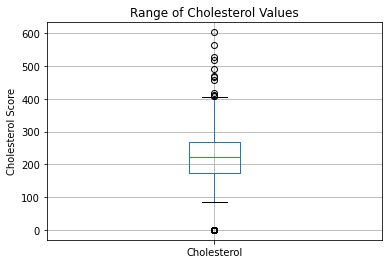

In [71]:
# looking for inconsistencies in data for numerical column 'Cholesterol'
df.boxplot(column = 'Cholesterol')
plt.ylabel('Cholesterol Score')
plt.title('Range of Cholesterol Values');
# Outliers at the upper and lower ranges of the data set to explore

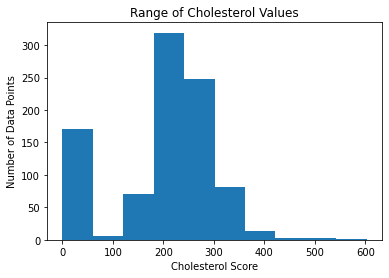

In [70]:
plt.hist(df['Cholesterol'])
plt.xlabel('Cholesterol Score')
plt.ylabel('Number of Data Points')
plt.title('Range of Cholesterol Values');

In [61]:
# Evaluating the outliers
df.loc[df['Cholesterol'] >= 400, :]
# After researching online, values up to 600 can occur, although rare.
# Since other data features look normal for the entries greater than 400, will leave them in

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
182,52,M,ASY,140,404,0,Normal,124,Y,2.0,Flat,1
250,44,M,ASY,135,491,0,Normal,135,N,0.0,Flat,1
496,58,M,ASY,132,458,1,Normal,69,N,1.0,Down,0
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [62]:
# Evaluating the outliers
df.loc[df['Cholesterol'] <= 50, :]
# Values of 0 look to be nulls, although the remaining data is present

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [63]:
# Exploring counts of 'Cholesterol' column to see how many 0 values are present
df['Cholesterol'].value_counts()
# nearly 20 percent of the values for 'Cholesterol' are zero 
# I will consider dropping the column at a later stage in the EDA

0      171
254     11
223     10
220     10
230      9
      ... 
355      1
354      1
353      1
349      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

In [ ]:
# Fasting BS
df['FastingBS'].value_counts()
# Values align with data dictionary categorical values

In [ ]:
# looking for inconsistencies in data for numerical column 'MaxHR'
df.boxplot(column = 'MaxHR');
# Outliers seem very low, will dig deeper

In [ ]:
# Evaluating the outliers
df.loc[df['MaxHR'] <= 70, :]
# ouliers with a MaxHR of <70 seem extremely low to me, however
# Since most of them also have heart disease and the rest of the data looks good
# Perhaps just outliers vs errors

In [ ]:
# Oldpeak
df['Oldpeak'].value_counts()
# Values are linked

In [ ]:
df['Oldpeak'].hist();

In [ ]:
# Exploring  column
df['HeartDisease'].value_counts()

In [ ]:
# Exploring  column
df['Sex'].value_counts()
# Values reflect correct values
# Data set is NOT balanced

In [ ]:
# Exploring 'ChestPainType' column
df['ChestPainType'].value_counts()
# Values reflect the values listed on Kaggle

In [ ]:
# Exploring 'RestingECG' column
df['RestingECG'].value_counts()
# values are consistent with values listed on Kaggle

In [ ]:
# Exploring 'RestingECG' column
df['ExerciseAngina'].value_counts()
# values are consistent with values listed on Kaggle

In [ ]:
# Exploring 'ST_Slope' column
df['ST_Slope'].value_counts()
# values are consistent with values listed on Kaggle

In [ ]:
# Heat Map
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);
# No attributes have high correlation with heart disease, will need to turn to ML models

# Pre- Processing

In [ ]:
X = df.drop(columns = 'HeartDisease')
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

In [ ]:
cat_feat= make_column_selector(dtype_include = 'object')
quant_feat = make_column_selector(dtype_include = 'number')
encoder = OneHotEncoder(handle_unknown = 'ignore') # 'ignore' = in case new data is added
scaler = StandardScaler()
column_transformer = make_column_transformer((encoder, cat_feat), (scaler, quant_feat))
column_transformer

# Bagged Tree

Test accuracy: 0.8608695652173913

In [ ]:
# Bagged Tree
bt = BaggingClassifier()

bt_pipe = make_pipeline(column_transformer, bt)
bt_pipe.fit(X_train, y_train)
bt_pipe_predictions = bt_pipe.predict(X_test)
bt_pipe.score(X_train, y_train)
bt_pipe.score(X_test, y_test)

print('Training accuracy:', bt_pipe.score(X_train, y_train))
print('Test accuracy:', bt_pipe.score(X_test, y_test))

# model only was able to produce 86% accuracy, will try other models

In [ ]:
bt

# Random Forest

Test accuracy: 0.9 

In [ ]:
# Random Forest
rf = RandomForestClassifier()

rf_pipe = make_pipeline(column_transformer, rf)
rf_pipe.fit(X_train, y_train)
rf_pipe_predictions = rf_pipe.predict(X_test)
rf_pipe.score(X_train, y_train)
rf_pipe.score(X_test, y_test)

print('Training accuracy:', rf_pipe.score(X_train, y_train))
print('Test accuracy:', rf_pipe.score(X_test, y_test))

# rf defauly model produced 87% accuracy, time to try hypertuning

In [ ]:
rf

In [ ]:
#Trying a max depth of 9 and changing the estimators to 200 instead of default 100
rf_9 =RandomForestClassifier(random_state = 42, max_depth = 9, n_estimators = 200)
#Make a pipeline and include column transformer
rf9_pipe = make_pipeline(column_transformer, rf_9)

# Fit on training data only
rf9_pipe.fit(X_train, y_train)

print('Training accuracy:', rf9_pipe.score(X_train, y_train))
print('Test accuracy:', rf9_pipe.score(X_test, y_test))

In [ ]:
#Trying a max depth of 2 and changing the estimators to 200 instead of default 100
rf_2 =RandomForestClassifier(random_state = 42, max_depth = 2, n_estimators = 200)
#Make a pipeline and include column transformer
rf2_pipe = make_pipeline(column_transformer, rf_2)

# Fit on training data only
rf2_pipe.fit(X_train, y_train)

print('Training accuracy:', rf2_pipe.score(X_train, y_train))
print('Test accuracy:', rf2_pipe.score(X_test, y_test))

In [ ]:
#Trying a max depth of 8 and changing the estimators to 200 instead of default 100
rf_8 =RandomForestClassifier(random_state = 42, max_depth = 8, n_estimators = 200)
#Make a pipeline and include column transformer
rf8_pipe = make_pipeline(column_transformer, rf_8)

# Fit on training data only
rf8_pipe.fit(X_train, y_train)

print('Training accuracy:', rf8_pipe.score(X_train, y_train))
print('Test accuracy:', rf8_pipe.score(X_test, y_test))

In [ ]:
#Trying a max depth of 8 and changing the estimators to 50 instead of default 100
rf_8 =RandomForestClassifier(random_state = 42, max_depth = 8, n_estimators = 50)
#Make a pipeline and include column transformer
rf8_pipe = make_pipeline(column_transformer, rf_8)

# Fit on training data only
rf8_pipe.fit(X_train, y_train)

print('Training accuracy:', rf8_pipe.score(X_train, y_train))
print('Test accuracy:', rf8_pipe.score(X_test, y_test))

In [ ]:
#Trying a max depth of 8 and changing the estimators to 250 instead of default 100
rf_8 =RandomForestClassifier(random_state = 42, max_depth = 8, n_estimators = 250)
#Make a pipeline and include column transformer
rf8_pipe = make_pipeline(column_transformer, rf_8)

# Fit on training data only
rf8_pipe.fit(X_train, y_train)

print('Training accuracy:', rf8_pipe.score(X_train, y_train))
print('Test accuracy:', rf8_pipe.score(X_test, y_test))

For the rf model, max depth of 8 and n_estimators of 200 performed the best

# KNN = Most accurate

Test accuracy: 0.908695652173913


In [ ]:
# default knn
knn = KNeighborsClassifier

knn_pipe = make_pipeline(column_transformer, knn(n_neighbors = 5))
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_test)
knn_pipe.score(X_train, y_train)
knn_pipe.score(X_test, y_test)

print('Training accuracy:', knn_pipe.score(X_train, y_train))
print('Test accuracy:', knn_pipe.score(X_test, y_test))

# default knn model produces accuracy of ~87%

In [ ]:
knn = KNeighborsClassifier

knn_pipe = make_pipeline(column_transformer, knn(n_neighbors = 3))
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_test)
knn_pipe.score(X_train, y_train)
knn_pipe.score(X_test, y_test)

print('Training accuracy:', knn_pipe.score(X_train, y_train))
print('Test accuracy:', knn_pipe.score(X_test, y_test))

# Hypertuning to 3 neighbors reduces accuracy 

In [ ]:
knn = KNeighborsClassifier

knn_pipe = make_pipeline(column_transformer, knn(n_neighbors = 15))
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_test)
knn_pipe.score(X_train, y_train)
knn_pipe.score(X_test, y_test)

print('Training accuracy:', knn_pipe.score(X_train, y_train))
print('Test accuracy:', knn_pipe.score(X_test, y_test))

# Hypertuning to 15 neighbors performs better than 5 neighbors

In [ ]:
knn = KNeighborsClassifier

knn_pipe = make_pipeline(column_transformer, knn(n_neighbors = 11))
knn_pipe.fit(X_train, y_train)
knn_pipe_predictions = knn_pipe.predict(X_test)
knn_pipe.score(X_train, y_train)
knn_pipe.score(X_test, y_test)

print('Training accuracy:', knn_pipe.score(X_train, y_train))
print('Test accuracy:', knn_pipe.score(X_test, y_test))

# Hypertuning to 11 neighbors is the best fit thus far, and I also ran,8, 9, 10, 12, 13, 14 neighbors

# Metrics

In [ ]:
plot_confusion_matrix(knn_pipe, X_test, y_test, values_format='', cmap = 'Blues')

plt.title('Confusion Matrix for Heart Disease Predictions');


In [ ]:
print("Recall score:" ,recall_score(y_test, knn_pipe.predict(X_test), average = 'weighted'))

In [ ]:
print('Precision:' ,precision_score(y_test, knn_pipe.predict(X_test), average = 'weighted'))

In [ ]:
#Classification Report
predictions = knn_pipe.predict(X_test)
print(classification_report(y_test, predictions))

# Conclusion

> KNN model performed the best of all the models, predicting heart disease with 91% accuracy